In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('day.csv')

# Select relevant columns for prediction
selected_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_features = ['season', 'weathersit']
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Combine encoded categorical features with numerical features
X = np.concatenate((encoded_categorical, data[selected_features].values), axis=1)

# Target variable (cnt)
y = data['cnt'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 649865.362574953
R-squared (R2): 0.8379340549658564


C:\Users\Ashish Moharana\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


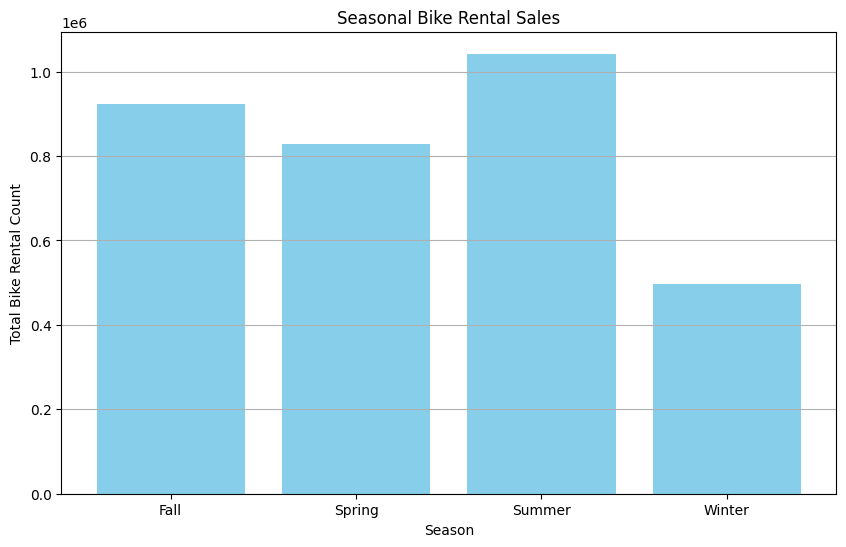

In [17]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('day.csv')

# Extract the year and month from the 'date' column
data['year'] = pd.to_datetime(data['dteday']).dt.year
data['month'] = pd.to_datetime(data['dteday']).dt.month

# Define a function to map months to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Apply the season mapping function to create a 'season' column
data['season'] = data['month'].apply(get_season)

# Calculate seasonal sales (sum of 'cnt' for each season)
seasonal_sales = data.groupby('season')['cnt'].sum().reset_index()

import matplotlib.pyplot as plt

# Create a bar plot for seasonal sales
plt.figure(figsize=(10, 6))
plt.bar(seasonal_sales['season'], seasonal_sales['cnt'], color='skyblue')
plt.title('Seasonal Bike Rental Sales')
plt.xlabel('Season')
plt.ylabel('Total Bike Rental Count')
plt.grid(axis='y')
plt.show()


c:\ALL THINGS\SOFTWARE\CODE\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ALL THINGS\SOFTWARE\CODE\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


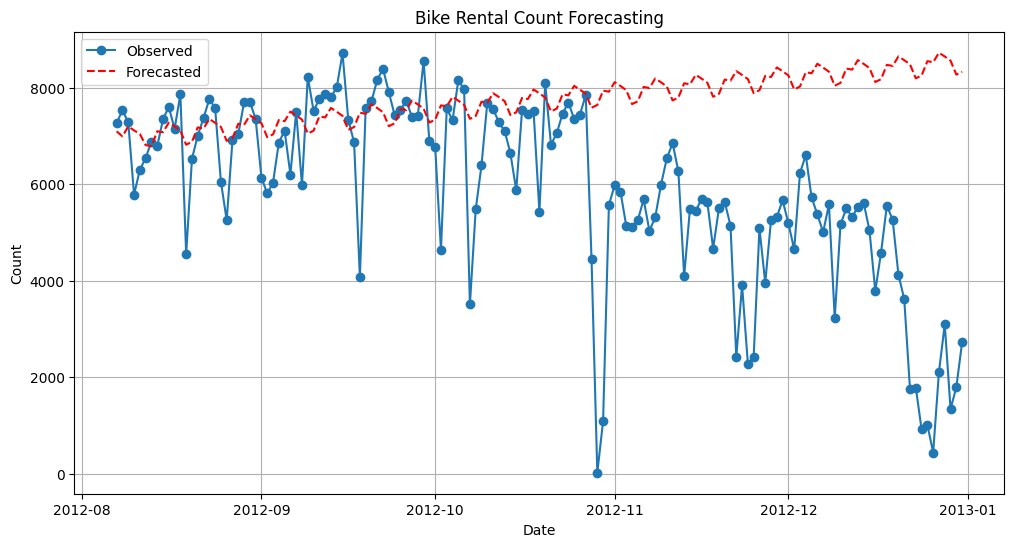

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('day.csv')

# Convert the 'dteday' column to a datetime format
data['date'] = pd.to_datetime(data['dteday'])

# Set 'date' as the index of the DataFrame (required for time series analysis)
data.set_index('date', inplace=True)

# Extract the 'cnt' column for bike rental counts
count_data = data['cnt']

# Train-test split
train_size = int(0.8 * len(count_data))
train_data, test_data = count_data[:train_size], count_data[train_size:]

# Fit a Seasonal ARIMA model (you can adjust the order and seasonal_order parameters)
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=0)

# Forecast future bike rental counts
forecast_periods = len(test_data)
forecast = model_fit.forecast(steps=forecast_periods)

# Plot the observed data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(count_data.index[train_size:], test_data, label='Observed', marker='o')
plt.plot(count_data.index[train_size:], forecast, label='Forecasted', linestyle='--', color='r')
plt.title('Bike Rental Count Forecasting')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
